In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from utils import get_data

In [7]:
speed        = '7_0'
cma          = 'CMA_ES-07_28-15_21'
hgso         = 'HGSO-07_28-15_47'
openai       = 'OPENAI_ES-07_28-15_34'
# pso          = 'PSO-07_18-16_57' 
save_figure  = False

## Obtem Dados

In [8]:

df_cma = get_data(cma, speed, drop_columns=True, only_valids=True, top_ten=True)
df_hgso = get_data(hgso, speed, drop_columns=True, only_valids=True, top_ten=True)
df_openai = get_data(openai, speed, drop_columns=True, only_valids=True, top_ten=True)
# df_pso = get_data(pso, speed, drop_columns=True, only_valids=True, top_ten=True)

## Plota dados

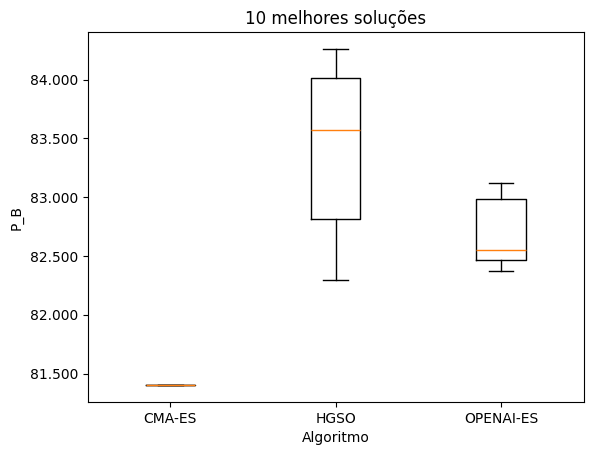

In [9]:
# Dados
# data = [df_cma['P_B'], df_openai['P_B'], df_hgso['P_B'], df_pso['P_B']]
data = [df_cma['P_B'], df_openai['P_B'], df_hgso['P_B']]

# Rótulos dos grupos
# labels = ['CMA-ES', 'OPENAI-ES', 'HGSO', 'PSO']
labels = ['CMA-ES', 'OPENAI-ES', 'HGSO']

# Plotar os dados
plt.boxplot(data, labels=labels)

# Formatar o eixo y para exibir três casas antes da vírgula e duas casas decimais
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.3f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Definir o título e os rótulos dos eixos
plt.title('10 melhores soluções')
plt.xlabel('Algoritmo')
plt.ylabel('P_B')

# Salva plot
if save_figure:
    plt.savefig('plots/compare_methods_' + speed + '.png')

# Exibir o gráfico
plt.show()